In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import *

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import average_precision_score

In [3]:
data1_path ="/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Option Biologie/genetique_network/data_train(2)/data1.csv"
target1_path = "/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Option Biologie/genetique_network/data_train(2)/target1.csv"

## Chargement des données et visualisation 
data = pd.read_csv(data1_path)
target = pd.read_csv(target1_path)

## Utiliser la fonction de l'exercice 1 pour remplacer les valeurs manquantes
data = replace_random_value(data)

In [6]:
data

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
0,-0.274018,-1.609865,-0.546092,-0.762529,-0.738399,0.202632,-1.179910,-1.068921,-1.184767,0.057903,-0.755056,-0.442939,-1.676398,-1.287949,-1.180937,-1.372720,-0.960208,-1.523203,-1.333317,-0.628882
1,-1.445791,0.800972,-1.300660,-1.179378,-1.289348,0.381551,-0.834005,-0.425970,-0.959331,-0.770250,-1.683891,-0.692397,0.357126,-0.611319,-1.544684,-1.263291,-1.445179,-0.946510,-1.439712,-0.321130
2,0.040794,-0.304655,0.138629,0.066356,-0.419415,-0.530303,-0.639287,-0.426780,-0.180585,-0.672954,-0.503293,-0.243091,-0.033607,-0.296831,-0.698863,-0.891388,-0.740804,-0.930931,-0.746842,-0.740830
3,1.750802,0.151451,1.703113,1.682361,0.910788,0.221794,1.412876,-0.462257,1.544998,2.066780,-0.832776,1.713802,-0.345628,1.424940,1.263261,0.382586,0.654751,0.568670,1.238103,1.670034
4,-0.898138,0.234620,-1.057411,-0.935669,-0.832055,-0.127360,-0.998315,-0.905834,-0.674983,-0.413765,-2.127721,-1.208617,1.609004,-0.059728,-1.245270,-1.800076,-1.259535,-1.014337,-1.518317,-1.787845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.414328,0.333560,0.635188,0.632639,1.329929,0.329263,1.223480,1.046212,0.618049,0.102052,0.835533,0.186060,0.360612,0.703558,0.995489,1.266455,1.591344,1.318054,1.194835,-0.166953
496,-2.245602,1.110420,-2.292283,-1.985672,-2.119721,1.189463,-1.537008,-1.348713,-1.152988,-2.415875,1.294491,-1.969802,-1.777263,-0.941849,-0.526532,0.214223,-1.826925,-0.563778,-0.731274,-2.150654
497,0.834846,-1.220305,1.341767,0.918367,1.202087,-0.641387,0.662329,0.484788,0.197038,0.712077,0.506225,0.440309,1.473334,0.125099,1.042725,0.571546,0.723330,-0.039347,0.825348,0.411382
498,1.483218,1.676076,1.269225,1.739186,1.086647,1.898702,1.917825,2.104011,2.190874,1.670443,-1.144572,1.651900,-0.173265,2.232839,1.409966,-0.304014,0.738323,1.695054,1.228466,1.538031


## Question 1

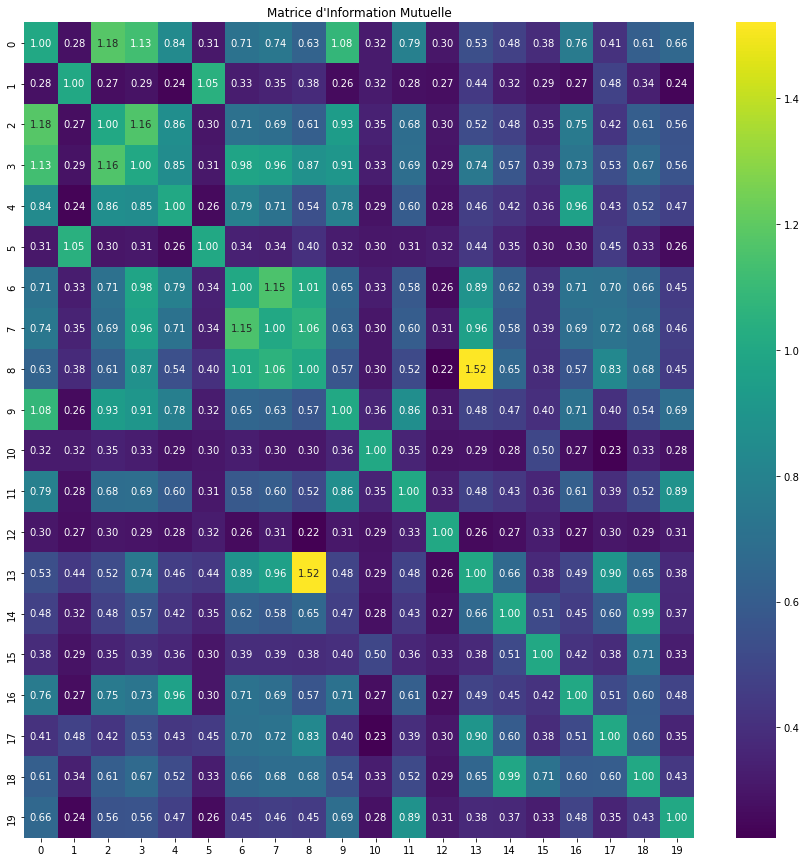

In [25]:
from sklearn.metrics import mutual_info_score

def information_mutuelle(data,bins=20):
    """"Retourne l'information mutuelle"""
    # Initialisation de la matrice d'information mutuelle
    num_variables = data.shape[1]  # Nombre de variables
    mutual_info_matrix = np.zeros((num_variables, num_variables))

    # Calcul de l'information mutuelle pour chaque paire de variables
    for i in range(num_variables):
        for j in range(i, num_variables): #Par symétrie de l'information mutuelle, pas besoin de calculer deux fois 
            if i == j:
                # L'information mutuelle d'une variable avec elle-même est maximale
                # Cependant, mutual_info_score calcule cela comme 0, donc pour avoir une matrice plus intuitive, vous pouvez
                # mettre la diagonale à 1 par exemple ou bien mettre la valeur maximale à la fin 
                mutual_info_matrix[i, j] = 1
            else:
                # Effectuer un binning des données voir slide 35 cours 2
                hist_2d, x_edges, y_edges = np.histogram2d(data.iloc[:, i], data.iloc[:, j], bins=bins)
                # Calculer l'information mutuelle à partir de l'histogramme 2D
                mutual_info = mutual_info_score(None, None, contingency=hist_2d)
                mutual_info_matrix[i, j] = mutual_info_matrix[j, i] = mutual_info
    return mutual_info_matrix

mutual_info_matrix = information_mutuelle(data,bins=20)
# Si vous voulez visualiser la matrice d'information mutuelle 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(mutual_info_matrix, annot=True, fmt=".2f", cmap="viridis")
plt.title("Matrice d'Information Mutuelle")
plt.show()

## Question 2 - 3 

Text(0.5, 1.0, 'Matrice de corrélation non signée ')

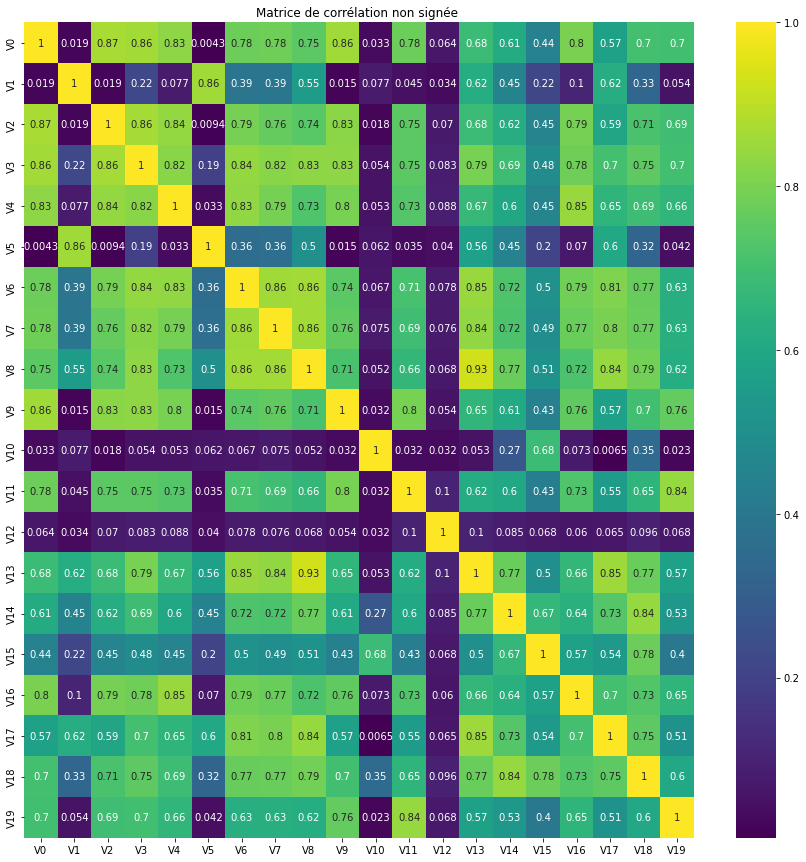

In [8]:
matrix_corr1 = data.corr().abs()
plt.figure(figsize=(15,15))
sns.heatmap(matrix_corr1,annot=True,cmap='viridis',cbar=True)
plt.title("Matrice de corrélation non signée ")

Text(0.5, 1.0, "Écarts entre la matrice de corrélation non signée et la matrice d'information mutuelle ")

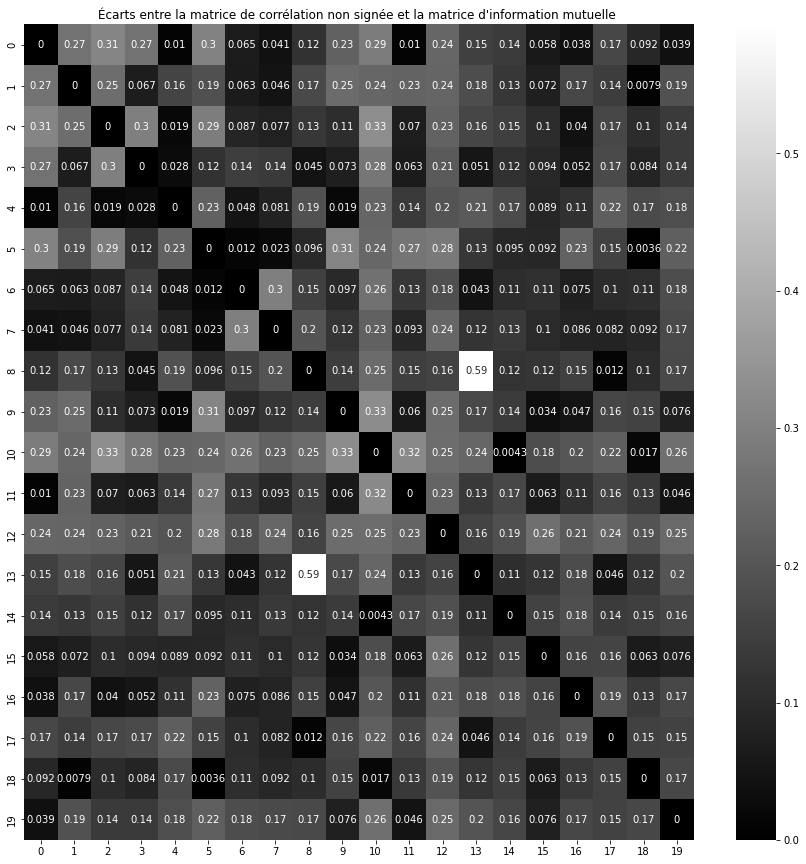

In [23]:


plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(np.abs(matrix_corr1.to_numpy() - mutual_info_matrix)),annot=True,cmap='gray',cbar=True)
plt.title("Écarts entre la matrice de corrélation non signée et la matrice d'information mutuelle ")

Les valeurs ne sont pas trop éloignées les unes des autres.

In [31]:
## Adaptation de l'exo2 pour l'exo 4 

def exo4(data_path,target_path):

    nb_network = data_path[-5]

    ## Chargement des données et visualisation 
    data = pd.read_csv(data_path)
    target = pd.read_csv(target_path)

    ## Utiliser la fonction de l'exercice 1 pour remplacer les valeurs manquantes
    data = replace_random_value(data)
    mutual_info_matrix = information_mutuelle(data,bins=20)

    plt.figure(figsize=(15,15))
    sns.heatmap(mutual_info_matrix,annot=True,cmap='viridis',cbar=True)
    plt.title(f"Matrice d'information mutuelle' pour le réseau {nb_network}")

    cause, effet, score  = [],[],[] 
    n=len(mutual_info_matrix)

    for i in range(n):
        for j in range(n):
            if i == j:
                score.append(0)
                cause.append(data.columns[i])
                effet.append(data.columns[j])
            else:
                score.append(mutual_info_matrix[i,j])
                cause.append(data.columns[i])
                effet.append(data.columns[j])
    
    
    predictions_network = pd.DataFrame(np.array([cause, effet, score]).T,columns=["cause", "effet", "score"])

    sorted_index = predictions_network['score'].sort_values(ascending=False).index #permets d'avoir les indices triés par décroissance au niveau du score

    predictions_network = predictions_network.iloc[sorted_index] #réordonner le dataset

    #predictions_network.to_csv(os.path.join(os.getcwd(),f"exo4_pred/predictions_network{nb_network}.csv"),index=False)

    #Question 4 

    n = len(mutual_info_matrix)

    causal_matrix = pd.DataFrame(np.zeros((n,n)),index=data.columns,columns=data.columns)

    for c1,c2 in zip(target.iloc[:,0].values,target.iloc[:,1].values):
        causal_matrix.loc[c1][c2] = 1

    copy_matrix_mutual_info = np.copy(mutual_info_matrix)

    np.fill_diagonal(copy_matrix_mutual_info,0) # ce code est mieux qu'une boucle for pour mettre des 0 sur la diagonale

    flaten_causal_matrix = np.array(causal_matrix).flatten()
    flaten_matrix_corr = copy_matrix_mutual_info.flatten()

    # Calcul de la courbe précision/rappel
    precision, recall, thresholds = precision_recall_curve(flaten_causal_matrix, flaten_matrix_corr)

    # Affichage de la courbe
    display = PrecisionRecallDisplay(precision=precision, recall=recall)
    display.plot()
    plt.title(f"courbe précision/rappel pour le réseau {nb_network}")
    plt.show()

    print(f"score de précision moyenne pour le réseau {nb_network} est de : ", average_precision_score(flaten_causal_matrix, flaten_matrix_corr))

    


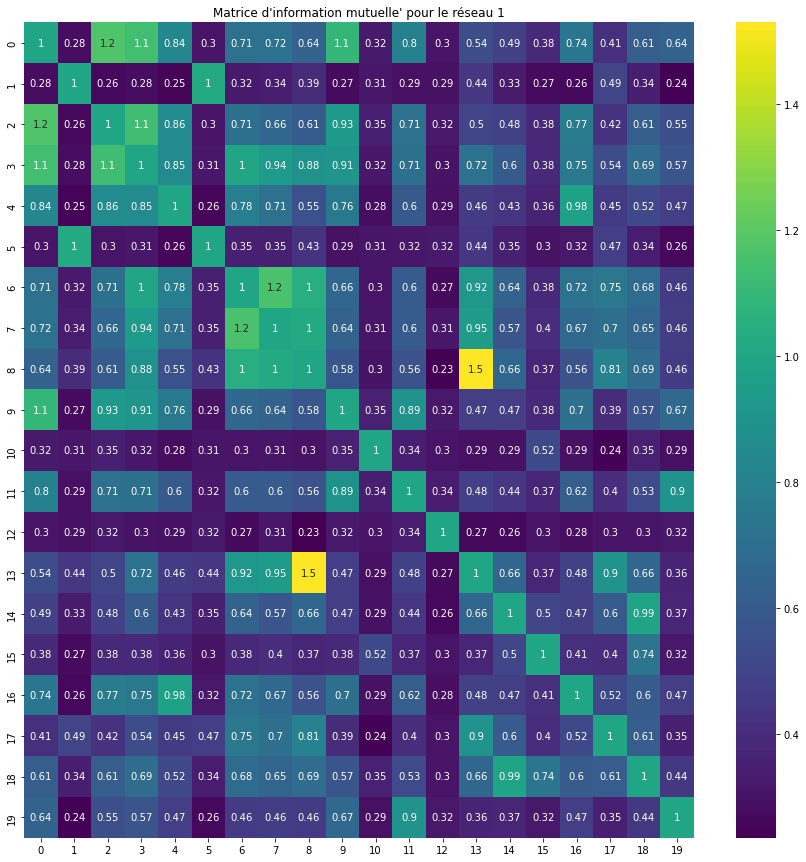

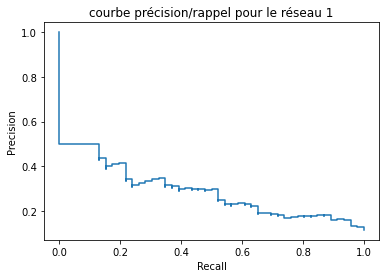

score de précision moyenne pour le réseau 1 est de :  0.2873957984899922


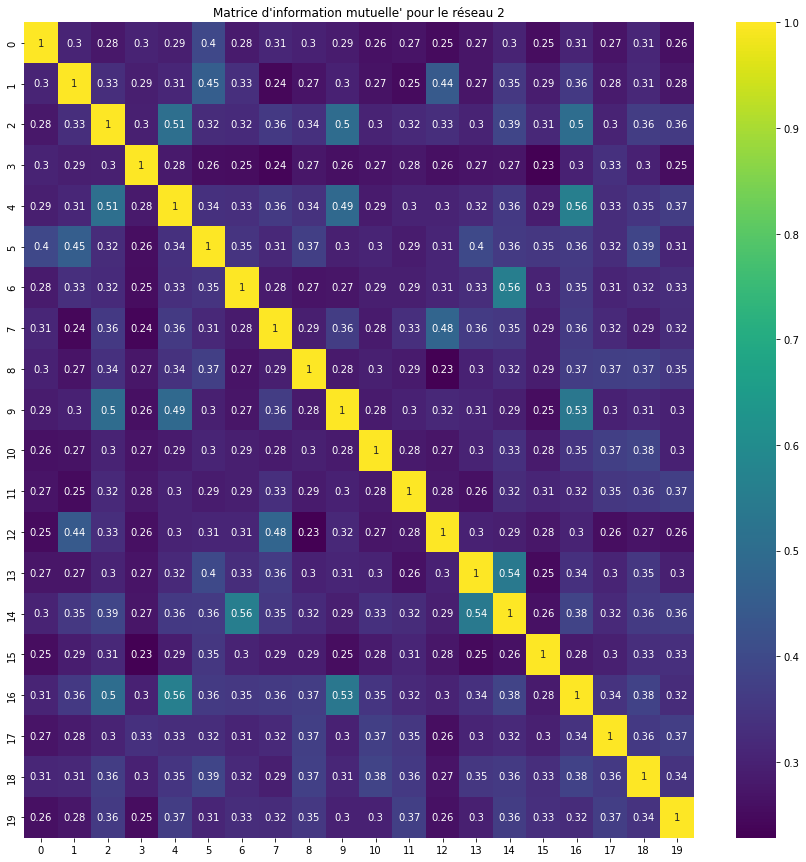

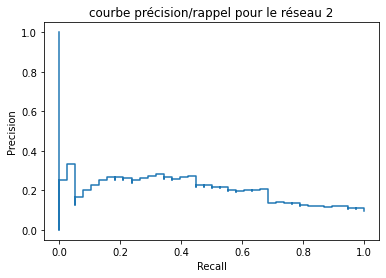

score de précision moyenne pour le réseau 2 est de :  0.20416276124373123


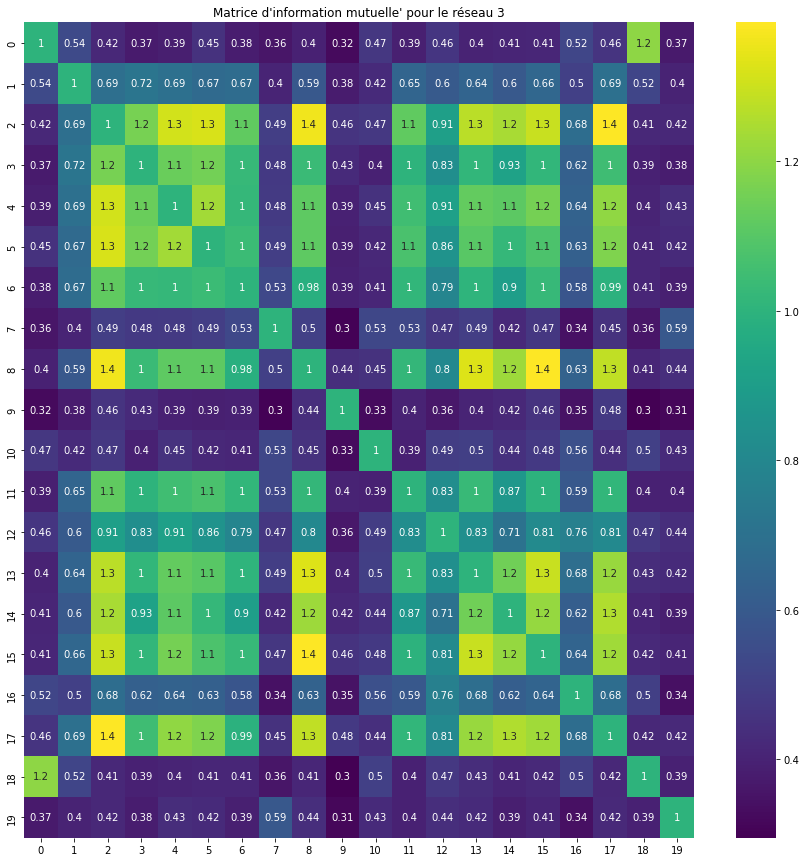

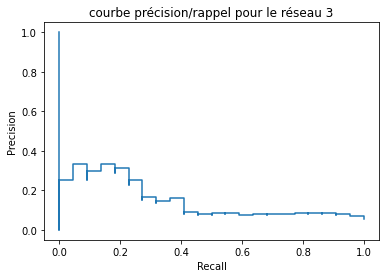

score de précision moyenne pour le réseau 3 est de :  0.15077436619694554


In [34]:
data_path ="/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Option Biologie/genetique_network/data_train(2)"
os.listdir(data_path)

for i in range(1,4):
    data_path_i = os.path.join(data_path,f'data{i}.csv')
    target_path_i = os.path.join(data_path,f'target{i}.csv')

    exo4(data_path_i,target_path_i)